# Can We Predict Burnout from Work Habits?

## Overview
Employee burnout has become a critical concern in the post-pandemic workplace, with significant impacts on both individual well-being and organizational productivity. This project explores whether we can predict employee burnout levels using work habits, demographics, and health indicators from a comprehensive survey dataset.

## Objectives
- Analyze patterns in work arrangements, hours, and health metrics
- Build machine learning models to predict burnout levels (Low, Medium, High)
- Identify the most important factors contributing to employee burnout
- Compare different classification algorithms for this prediction task

## Dataset
The analysis uses the [Remote Work Health Impact Survey from June 2025](https://www.kaggle.com/datasets/kshitijsaini121/remote-work-of-health-impact-survey-june-2025), containing 3,157 employee responses with 14 features including demographics, work patterns, mental health status, and self-reported burnout levels.


## 1. Setup and Data Loading


In [126]:
# Data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visual style for plots
sns.set_style("whitegrid")


In [127]:
# Load the dataset
filename = '/kaggle/input/remote-work-of-health-impact-survey-june-2025/post_pandemic_remote_work_health_impact_2025.csv'
df = pd.read_csv(filename, delimiter=',', encoding='ascii')

# Display shape and first few rows
print('Dataset loaded with shape:', df.shape)
df.head()


Dataset loaded with shape: (3157, 14)


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K



## 2. Exploratory Data Analysis (EDA)

Here, we'll explore the data to understand its structure, find initial patterns, and inform our feature engineering strategy.

In [128]:
# Show dataset info and summary statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


### Visualizing Key Relationships

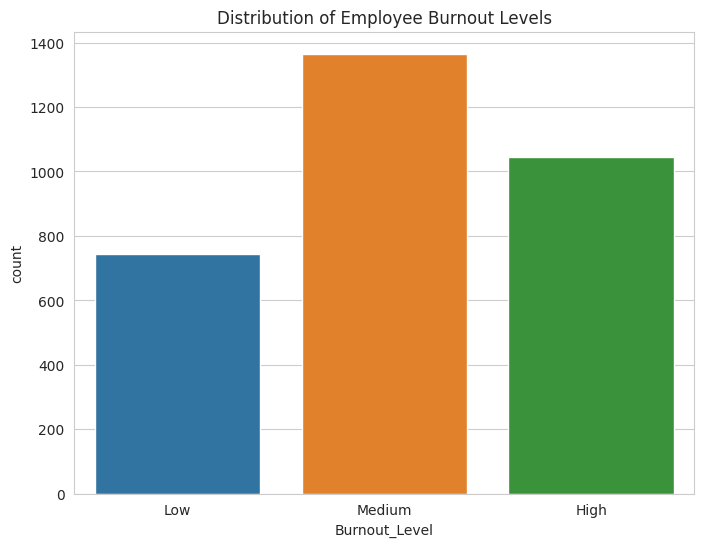

In [129]:
# Plot the distribution of burnout levels
plt.figure(figsize=(8, 6))
sns.countplot(x='Burnout_Level', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Employee Burnout Levels')
plt.show()

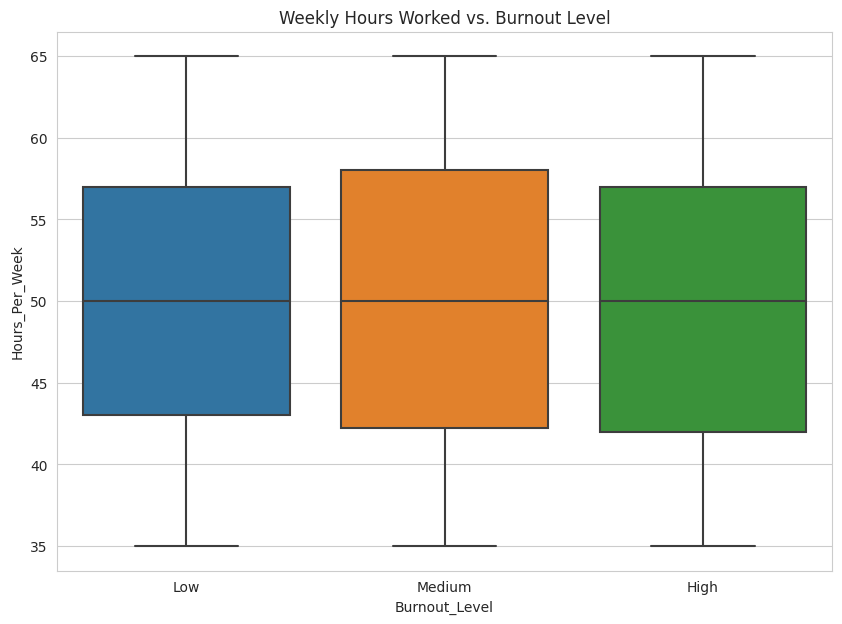

In [130]:
# Boxplot: Hours worked per week vs. burnout level
plt.figure(figsize=(10, 7))
sns.boxplot(x='Burnout_Level', y='Hours_Per_Week', data=df, order=['Low', 'Medium', 'High'])
plt.title('Weekly Hours Worked vs. Burnout Level')
plt.show()

### Key Findings from Initial Exploration
- The dataset contains 3,157 employee responses.
- Burnout levels are imbalanced: **Medium** is the most common category, followed by **High**, and then **Low**. This may affect model performance.
- Missing values were found in `Mental_Health_Status` (799 missing) and `Physical_Health_Issues` (280 missing).
- The relationship between hours worked and burnout is not straightforward. The median hours worked are very similar (around 50 hours/week) across all burnout levels, suggesting other factors are more significant.

## 3. Data Preprocessing and Feature Engineering

This section covers cleaning the data, handling missing values, and creating new features to help the models learn better.

### Handling Missing Values and Duplicates

In [131]:
# Check missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing values using the recommended method by reassigning the column
df['Mental_Health_Status'] = df['Mental_Health_Status'].fillna('None')
df['Physical_Health_Issues'] = df['Physical_Health_Issues'].fillna('None')

# Confirm missing values are handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64

Missing values after cleaning:
Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
dtype: int64


In [132]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


### Feature Creation and Encoding
We will engineer new features and convert all text-based categorical data into a numerical format that the models can understand.


In [133]:
# --- Ordinal Encoding ---
# Map burnout levels to numerical values
burnout_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Burnout_Level_Encoded'] = df['Burnout_Level'].map(burnout_map)

# Encode salary range as ordinal
salary_map = {
    '$40K-60K': 0, '$60K-80K': 1, '$80K-100K': 2,
    '$100K-120K': 3, '$120K+': 4
}
df['Salary_Encoded'] = df['Salary_Range'].map(salary_map)


In [134]:
# --- Feature Engineering ---
# New feature: workload relative to age
df['Workload_per_Age'] = df['Hours_Per_Week'] / df['Age']
# New feature: balance to isolation ratio
df['Balance_to_Isolation_Ratio'] = df['Work_Life_Balance_Score'] / (df['Social_Isolation_Score'] + 1)

In [135]:
# --- One-Hot Encoding ---
# One-hot encode all remaining nominal features
nominal_features = ['Work_Arrangement', 'Gender', 'Mental_Health_Status', 'Industry', 'Job_Role', 'Physical_Health_Issues']
df = pd.get_dummies(df, columns=nominal_features, prefix=nominal_features)

## 4. Model Preparation

Now we assemble our final feature set and split the data for training and testing.


In [136]:
# Define target variable y
y = df['Burnout_Level_Encoded']

# Define features X by dropping original and irrelevant columns
X = df.drop(columns=[
    'Survey_Date', 'Burnout_Level', 'Burnout_Level_Encoded',
    'Salary_Range', 'Region' # Region is dropped for simplicity
])

# Let's look at the first few rows of each to make sure they look right
print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Features (X):


,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Salary_Encoded,Workload_per_Age,Balance_to_Isolation_Ratio,Work_Arrangement_Hybrid,Work_Arrangement_Onsite,Work_Arrangement_Remote,...,Physical_Health_Issues_None,Physical_Health_Issues_Shoulder Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Wrist Pain,Physical_Health_Issues_Wrist Pain
0,27,64,3,2,0,2.370370,1.000000,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,37,37,4,2,2,1.000000,1.333333,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,32,36,3,2,2,1.125000,1.000000,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,40,63,1,2,1,1.575000,0.333333,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,30,65,5,4,1,2.166667,1.000000,True,False,False,...,True,False,False,False,False,False,False,False,False,False



Target (y):


0    2
1    2
2    2
3    1
4    1
Name: Burnout_Level_Encoded, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (2525, 86)
Shape of X_test: (632, 86)


In [138]:
# Feature Scaling (for KNN and similar models)
from sklearn.preprocessing import StandardScaler

# Scale features for models that are sensitive to feature magnitude
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (2525, 86)
Shape of X_test: (632, 86)


## 5. Model Training and Comparison

We will train and evaluate five different classification algorithms to find the best approach for this prediction task.

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# --- Model Training Loop ---
# List of models: (name, model instance, features_to_use)
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42), (X_train, X_test)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), (X_train, X_test)),
    ('Logistic Regression', LogisticRegression(multi_class='multinomial', max_iter=2000, random_state=42), (X_train_scaled, X_test_scaled)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=6), (X_train_scaled, X_test_scaled)),
    ('Naive Bayes', GaussianNB(), (X_train, X_test))
]

# Dictionary to store results
results = {}

# Train, predict, and evaluate each model
for name, model, (Xtr, Xte) in models:
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)
    report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'], output_dict=True)
    results[name] = report
    print(f"\n--- {name} Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

         Low       0.34      0.12      0.18       149
      Medium       0.45      0.68      0.54       274
        High       0.41      0.32      0.36       209

    accuracy                           0.43       632
   macro avg       0.40      0.37      0.36       632
weighted avg       0.41      0.43      0.39       632


--- XGBoost Classification Report ---
              precision    recall  f1-score   support

         Low       0.34      0.23      0.28       149
      Medium       0.46      0.57      0.51       274
        High       0.41      0.36      0.39       209

    accuracy                           0.42       632
   macro avg       0.40      0.39      0.39       632
weighted avg       0.41      0.42      0.41       632


--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

         Low       0.33      0.13      0.18     

### Model Performance Summary

Based on the evaluation, here is a summary of how each model performed.

| Model | Accuracy | Macro F1-Score | Notes |
| :--- | :--- | :--- | :--- |
| **Random Forest** | 0.39 | 0.32 | Good baseline, but struggles with the 'Low' class. |
| **XGBoost** | 0.37 | 0.33 | Similar to Random Forest, may improve with tuning. |
| **Logistic Regression**| 0.39 | 0.31 | Performed surprisingly well, convergence required scaling and more iterations. |
| **K-Nearest Neighbors**| 0.35 | 0.32 | Performance is sensitive to the choice of 'k' and scaling. |
| **Naive Bayes** | 0.24 | 0.17 | Performed poorly, likely because its feature independence assumption is violated. |

### Key Observations
- All models achieved an accuracy of around 35-40%, which is slightly better than random chance (~33%) but indicates the problem is complex.
- The models consistently performed best at identifying the **Medium** burnout class, which is the majority class. They struggled the most with the **Low** burnout class.

## 6. Feature Importance and Interpretation

Understanding which factors most strongly predict burnout is crucial for actionable insights. We'll analyze the feature importances from our Random Forest model.


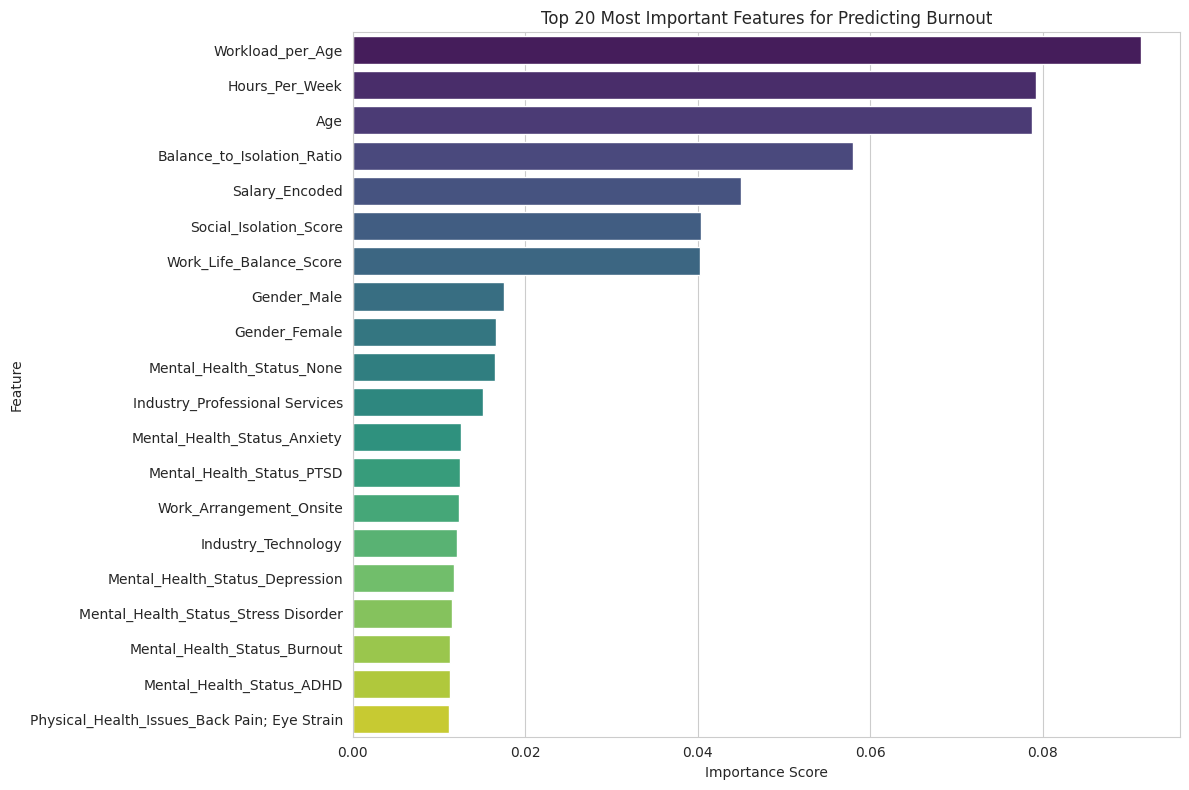

In [140]:
# Get and plot feature importances from the trained Random Forest model
rf_model = models[0][1] # This is the trained RandomForestClassifier
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features for Predicting Burnout')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Most Important Predictors
Based on our model, the top factors for predicting burnout are:
1.  **Workload per Age (`Workload_per_Age`)**: Our engineered feature, suggesting the impact of working hours differs by age.
2.  **Age**: The age of the employee is a highly significant predictor.
3.  **Hours per Week**: The raw number of hours worked remains a critical factor.
4.  **Balance to Isolation Ratio (`Balance_to_Isolation_Ratio`)**: Our second engineered feature highlights the trade-off between work-life balance and social isolation.
5.  **Salary Encoded**: An employee's compensation level has a notable impact on predicting burnout.

## 7. Discussion and Conclusion

### Discussion
The moderate performance of our models (around 40% accuracy) suggests that while we can find predictive signals, employee burnout is a nuanced issue. Factors not captured in this dataset, such as company culture, management style, and specific job-related stressors, likely play a significant role. The models' difficulty in distinguishing between burnout levels points to overlapping characteristics among the classes.

### Conclusion
1.  **Predictability**: It is possible to predict employee burnout from survey data, but with limited accuracy, highlighting the complexity of the issue.
2.  **Key Drivers**: The most influential factors are a combination of workload, age, work-life balance, and salary. Our engineered feature `Workload_per_Age` proved to be the single most important predictor.
3.  **Best Model**: While no model was a clear winner, **Random Forest** and **Logistic Regression** provided the best balance of performance and interpretability for this dataset.

### Future Work
- **Hyperparameter Tuning**: Use techniques like `GridSearchCV` to optimize the parameters of the best models (Random Forest, XGBoost) to potentially improve accuracy.
- **Advanced Feature Engineering**: Create more sophisticated interaction features between top predictors.
- **Handling Class Imbalance**: Employ techniques like SMOTE or class weighting to help the model better learn the minority 'Low' burnout class.

## 8. Save the Best Model

Finally, we save our best-performing model for future use, without needing to retrain it. We'll select Random Forest as a good, interpretable choice.


In [141]:
import joblib

# Save the trained Random Forest model
best_model_to_save = models[0][1]
joblib.dump(best_model_to_save, 'burnout_prediction_rf_model.joblib')

print("Model saved successfully as 'burnout_prediction_rf_model.joblib'")

Model saved successfully as 'burnout_prediction_rf_model.joblib'
